<a href="https://colab.research.google.com/github/EdwynZN/TLGColab/blob/main/DS_C3_SC1_EdwinZambranoNemegyei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: Edwin Zambrano Nemegyei

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [ ]:
happiness = pd.read_csv(r'happiness_report.csv')
happiness.head(4)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice.

In [ ]:
mexico = happiness.loc[happiness['Country or region'] == 'Mexico']
mexico.set_index('Country or region', inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

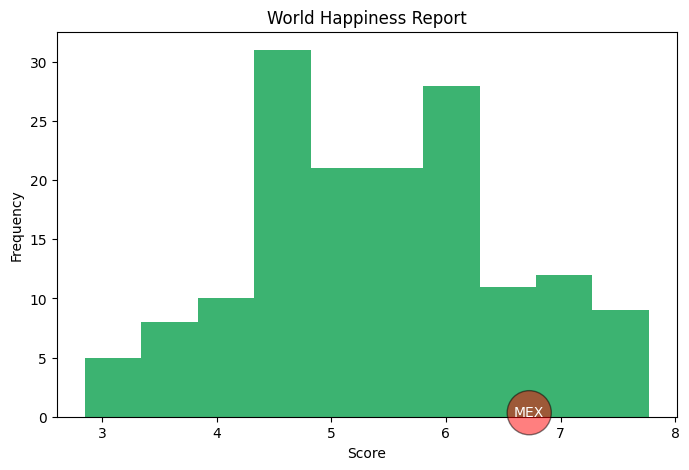

In [ ]:
fix, ax = plt.subplots(figsize=(8,5))
happiness['Score'].hist(ax=ax, grid=False, color='mediumseagreen')
ax.set_title('World Happiness Report')
ax.set_ylabel('Frequency')
ax.set_xlabel('Score')
ax.text(
    mexico['Score'].values[0],
    0,
    'MEX',
    bbox=dict(facecolor='red', alpha= 0.5, boxstyle='circle', pad=0.5),
    fontdict=dict(color='white', size='10')
);

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

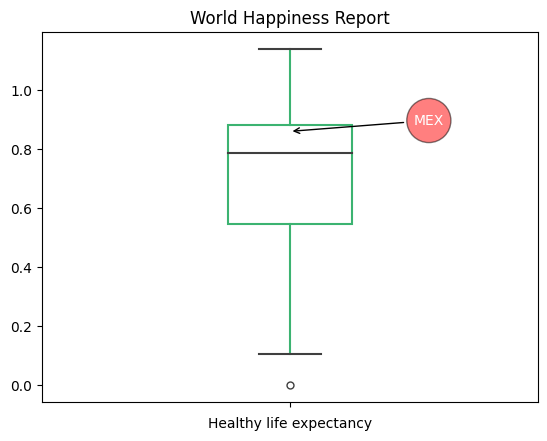

In [ ]:
ax: plt.Axes = sns.boxplot(
    y='Healthy life expectancy',
    data=happiness,
    dodge=False,
    width=0.25,
    boxprops={'fill': None, 'color': 'mediumseagreen'},
    whiskerprops={'color':'mediumseagreen'},
    flierprops={'markerfacecolor':'white', 'markersize':5, 'linestyle':'none', 'marker': 'o'}
)
ax.set_title('World Happiness Report')
ax.set_ylabel('')
ax.set_xlabel('Healthy life expectancy')
y = mexico['Healthy life expectancy'].values[0]
ax.annotate(
    'MEX',
    xy=(0,y),
    xytext=(0.75, 0.75),
    arrowprops=dict(arrowstyle='->', color='black'),
    textcoords=ax.transAxes,
    color='white',
    bbox=dict(facecolor='red', alpha= 0.5, boxstyle='circle', pad=0.5),
);

6.	Crea un gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

,Factors
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


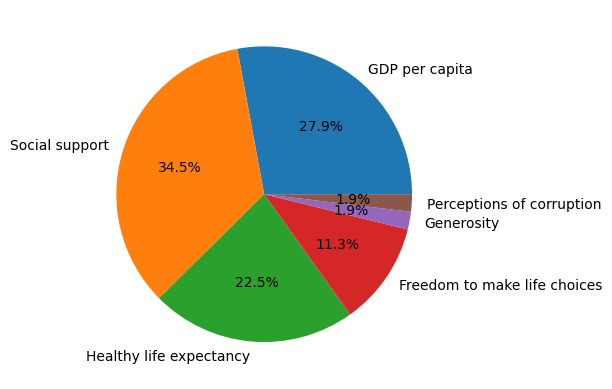

In [ ]:
factors_mexico = mexico.reset_index().iloc[:, 3:].T.rename(columns={0: 'Factors'})
ax= factors_mexico.plot.pie(subplots=True, labels=factors_mexico.index, autopct=r'%1.1f%%')
ax[0].legend('', frameon=False)
ax[0].set_ylabel('');
factors_mexico

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

Text(0.5, 1.0, 'World Happiness Report')

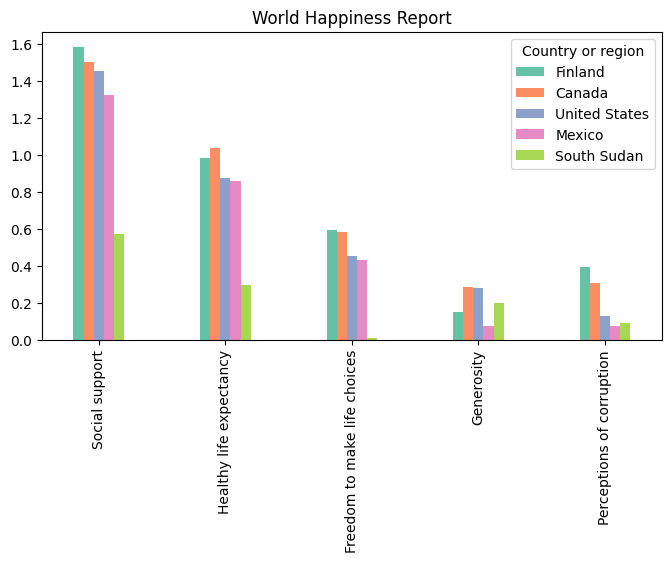

In [ ]:
countries: pd.DataFrame = happiness.loc[
    (happiness['Country or region'].isin(['Mexico', 'United States', 'Canada'])) |
    (happiness['Score'] == happiness['Score'].max()) |
    (happiness['Score'] == happiness['Score'].min())]
countries.set_index('Country or region', inplace=True)
sns.set_palette('Set2')
ax = countries.iloc[:, 3:].T.plot.bar(figsize=(8,4), width=0.4)
ax.set_xlabel('')
ax.set_title('World Happiness Report')


8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

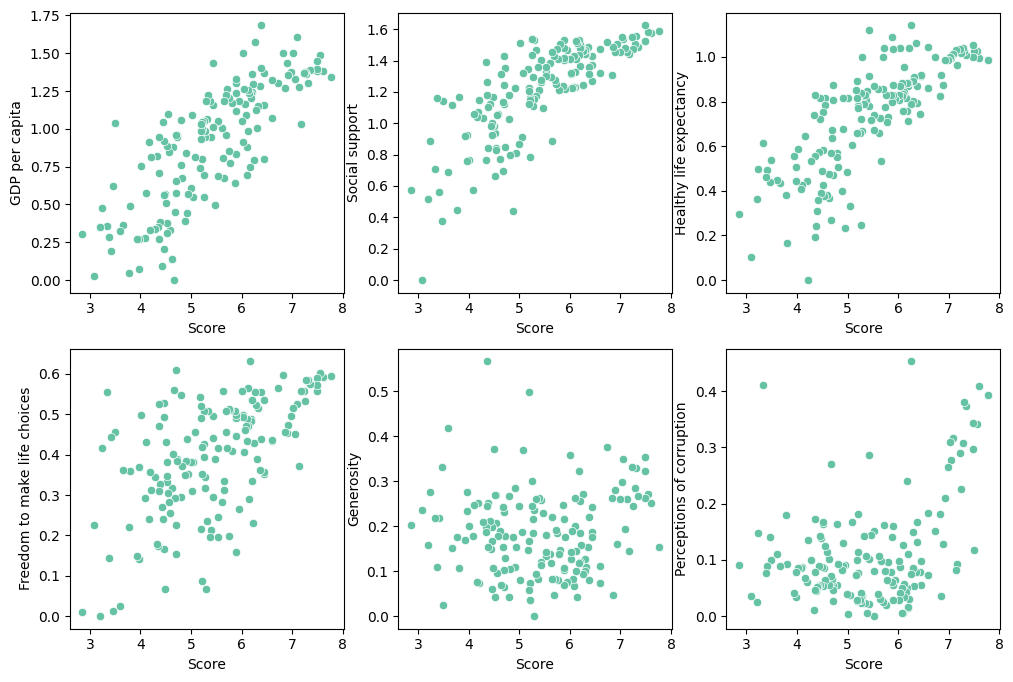

In [ ]:
fig = plt.figure(figsize=(12,8))

y_columns = happiness.columns.values[3:]
for i in range(y_columns.size):
    ax = fig.add_subplot(231 + i)
    scatplot = sns.scatterplot(x='Score', y=y_columns[i], data=happiness)

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

<Axes: >

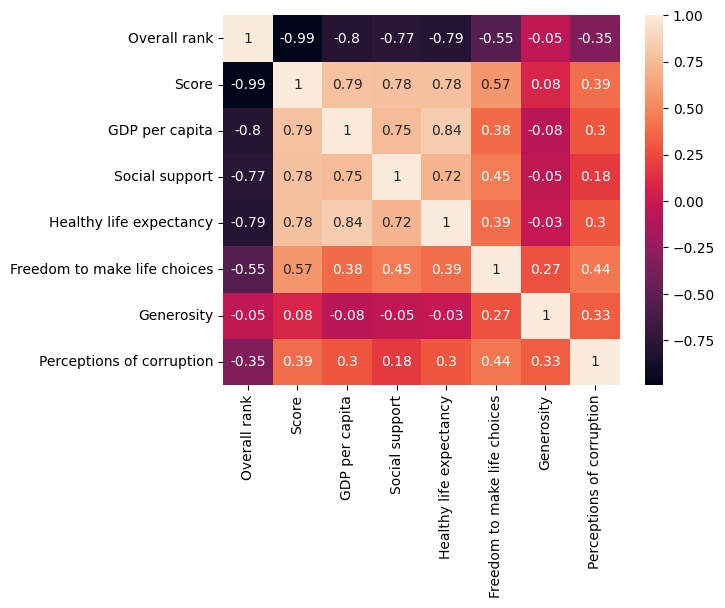

In [ ]:
sns.heatmap(round(happiness.iloc[:, ~happiness.columns.isin(['Country or region'])].corr(), 2), annot=True)

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región.

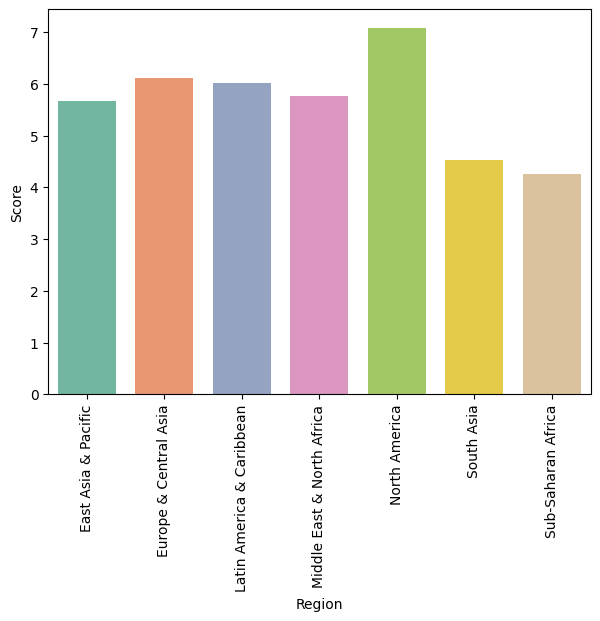

In [ ]:
metadata = pd.read_csv(r'Metadata.csv')
merged_df = pd.merge(
    left=metadata,
    right=happiness,
    left_on='TableName',
    right_on='Country or region',
    how='inner',
)

region_df = merged_df[['Region', 'Score']].groupby('Region').mean()
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=region_df.index, y='Score', data=region_df, dodge=False, errorbar=None, width=0.75, ax=ax)
ax.set_xticklabels(region_df.index.values, rotation=90);